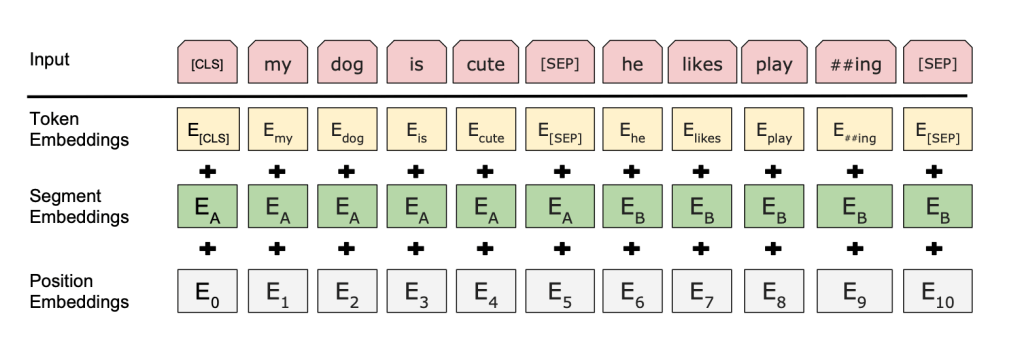

In [10]:
from IPython.display import Image
Image(filename='./samples/BERT-embeddings-2.png') 

## summary

- bert input embedding：一种查表操作（lookup table）
    - 查表
        - token embeddings：30522*768
        - segment embeddings：2*768
        - position embeddings: 512*768
    - 后处理
        - layer norm
        - dropout

In [1]:
from transformers import BertTokenizer, BertModel
import torch 
from torch import nn

In [58]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attention=True)

TypeError: __init__() got an unexpected keyword argument 'output_attention'

In [3]:
test_sent = 'this is a test sentence'

In [4]:
input = tokenizer(test_sent, return_tensors='pt')

In [18]:
input

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231, 6251,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [5]:
input_ids = input['input_ids']
token_type_ids = input['token_type_ids']

In [6]:
input_ids.shape

torch.Size([1, 7])

In [7]:
pos_ids = torch.arange(input_ids.shape[1])

In [8]:
pos_ids

tensor([0, 1, 2, 3, 4, 5, 6])

## 1. token embedding

In [9]:
token_embed = model.embeddings.word_embeddings(input_ids)

In [10]:
token_embed.shape

torch.Size([1, 7, 768])

In [11]:
token_embed

tensor([[[ 1.3630e-02, -2.6490e-02, -2.3503e-02,  ...,  8.6805e-03,
           7.1340e-03,  1.5147e-02],
         [-5.7095e-02,  1.5283e-02, -4.6868e-03,  ..., -3.2484e-03,
           9.7317e-05,  9.4175e-03],
         [-3.6044e-02, -2.4606e-02, -2.5735e-02,  ...,  3.3691e-03,
          -1.8300e-03,  2.6855e-02],
         ...,
         [ 2.3670e-02, -6.1351e-02, -2.9575e-02,  ..., -1.0239e-02,
          -7.2316e-03, -1.1745e-01],
         [ 3.2079e-02,  6.3135e-03, -6.4352e-03,  ..., -1.1689e-03,
          -1.0810e-01, -8.9524e-02],
         [-1.4521e-02, -9.9615e-03,  6.0263e-03,  ..., -2.5035e-02,
           4.6379e-03, -1.5378e-03]]], grad_fn=<EmbeddingBackward0>)

## 2. segment type embedding

In [12]:
seg_embed = model.embeddings.token_type_embeddings(token_type_ids)

In [13]:
seg_embed.shape

torch.Size([1, 7, 768])

In [14]:
seg_embed

tensor([[[ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
         [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
         [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
         ...,
         [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
         [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
         [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086]]],
       grad_fn=<EmbeddingBackward0>)

## 3. pos embedding

In [15]:
pos_embed = model.embeddings.position_embeddings(pos_ids)

In [16]:
pos_embed.shape

torch.Size([7, 768])

In [17]:
pos_embed

tensor([[ 1.7505e-02, -2.5631e-02, -3.6642e-02,  ...,  3.3437e-05,
          6.8312e-04,  1.5441e-02],
        [ 7.7580e-03,  2.2613e-03, -1.9444e-02,  ...,  2.8910e-02,
          2.9753e-02, -5.3247e-03],
        [-1.1287e-02, -1.9644e-03, -1.1573e-02,  ...,  1.4908e-02,
          1.8741e-02, -7.3140e-03],
        ...,
        [-5.6087e-03, -1.0445e-02, -7.2288e-03,  ...,  2.0837e-02,
          3.5402e-03,  4.7708e-03],
        [-3.0871e-03, -1.8956e-02, -1.8930e-02,  ...,  7.4045e-03,
          2.0183e-02,  3.4077e-03],
        [ 6.4257e-03, -1.7664e-02, -2.2067e-02,  ...,  6.7531e-04,
          1.1108e-02,  3.7521e-03]], grad_fn=<EmbeddingBackward0>)

## 4. input embedding

In [18]:
input_embed = token_embed + seg_embed + pos_embed.unsqueeze(0)

In [19]:
input_embed

tensor([[[ 0.0316, -0.0411, -0.0564,  ...,  0.0021,  0.0044,  0.0219],
         [-0.0489,  0.0285, -0.0204,  ...,  0.0190,  0.0265, -0.0045],
         [-0.0469, -0.0156, -0.0336,  ...,  0.0117,  0.0135,  0.0109],
         ...,
         [ 0.0185, -0.0608, -0.0331,  ...,  0.0040, -0.0071, -0.1213],
         [ 0.0294, -0.0017, -0.0217,  ..., -0.0004, -0.0913, -0.0948],
         [-0.0077, -0.0166, -0.0123,  ..., -0.0310,  0.0124, -0.0064]]],
       grad_fn=<AddBackward0>)

## 5. 后处理

In [20]:
embed = model.embeddings.LayerNorm(input_embed)

In [21]:
embed = model.embeddings.dropout(embed)

In [22]:
embed

tensor([[[ 0.1686, -0.2858, -0.3261,  ..., -0.0276,  0.0383,  0.1640],
         [-0.6485,  0.6739, -0.0932,  ...,  0.4475,  0.6696,  0.1820],
         [-0.6270, -0.0633, -0.3143,  ...,  0.3427,  0.4636,  0.4594],
         ...,
         [ 0.6010, -0.6970, -0.2001,  ...,  0.2960,  0.2060, -1.7181],
         [ 0.8323,  0.2878,  0.0021,  ...,  0.2628, -1.1310, -1.2708],
         [-0.1481, -0.2948, -0.1690,  ..., -0.5009,  0.2544, -0.0700]]],
       grad_fn=<NativeLayerNormBackward0>)

In [27]:
embed.shape

torch.Size([1, 7, 768])

### 6. encoder

In [23]:
model.config.hidden_size

768

In [24]:
model.config.num_attention_heads

12

In [25]:
att_head_size = int(model.config.hidden_size/model.config.num_attention_heads)

In [26]:
att_head_size

64

In [39]:
model.encoder.layer[0]

BertLayer(
  (attention): BertAttention(
    (self): BertSelfAttention(
      (query): Linear(in_features=768, out_features=768, bias=True)
      (key): Linear(in_features=768, out_features=768, bias=True)
      (value): Linear(in_features=768, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (output): BertSelfOutput(
      (dense): Linear(in_features=768, out_features=768, bias=True)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (intermediate): BertIntermediate(
    (dense): Linear(in_features=768, out_features=3072, bias=True)
  )
  (output): BertOutput(
    (dense): Linear(in_features=3072, out_features=768, bias=True)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

In [37]:
model.encoder.layer[0].attention.self.query.weight.shape

torch.Size([768, 768])

In [38]:
model.encoder.layer[0].attention.self.query.bias.shape

torch.Size([768])

In [47]:
Q_first_head = embed[0] @ model.encoder.layer[0].attention.self.query.weight.T[:, :att_head_size] + \
    model.encoder.layer[0].attention.self.query.bias[:att_head_size]

In [48]:
K_first_head = embed[0] @ model.encoder.layer[0].attention.self.key.weight.T[:, :att_head_size] + \
    model.encoder.layer[0].attention.self.key.bias[:att_head_size]

In [50]:
mod_attention = (1.0 - input['attention_mask'][[0]]) * -10000.0

In [51]:
mod_attention

tensor([[-0., -0., -0., -0., -0., -0., -0.]])

In [53]:
import math

In [54]:
attention_scores = torch.nn.Softmax(dim=-1)((Q_first_head @ K_first_head.T)/ math.sqrt(att_head_size) + mod_attention)

In [56]:
attention_scores.shape

torch.Size([7, 7])

In [59]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.11.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [60]:
from bertviz.transformers_neuron_view import BertModel, BertConfig